In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qmmc import *
import numpy as np

## Create a dummy dataset

In [8]:
n_samples, n_features = 1000, 5
w_real = np.random.randn(n_features)
b_real = np.random.randn()
X_real = 2 * (1. / 2 - np.random.rand(n_samples, n_features))
y_real = b_real + X_real.dot(w_real) + 0.1 * np.random.randn(n_samples)

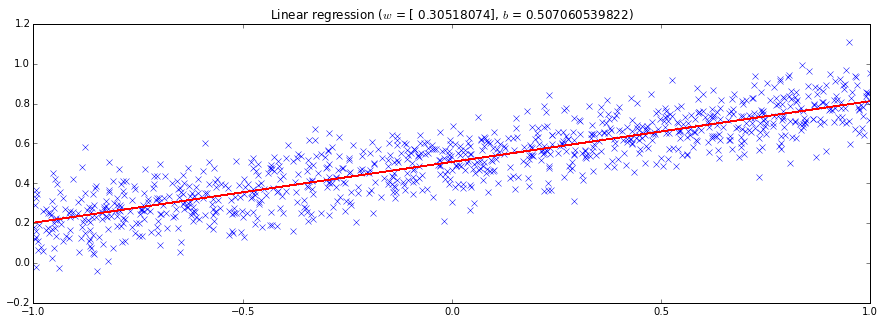

In [4]:
if n_features == 1:
    plt.figure(figsize=(15, 5))
    plt.plot(X_real, y_real, 'x')
    plt.plot(X_real, b_real + X_real.dot(w_real), color='r')
    plt.title(r"Linear regression ($w$ = %s, $b$ = %s)" % (w_real, b_real))

## Create a graph for the estimation

In [9]:
mu_0, sigma_0 = Value(0), Value(1)

X = Value(X_real)
w = Normal(mu_0, sigma_0, size=n_features, name='w')
b = Normal(mu_0, sigma_0, name='b')

@Function
def Xdotw(w=w, X=X, b=b):
    return b + X.dot(w)

y = Normal(Xdotw, Value(.1), value=y_real, observed=True, name='y')

In [10]:
model = Model([y, Xdotw, b, w])

In [11]:
print w_real
print w.value

[-0.10759093  0.90124544  1.18067877  1.00021495  0.20435185]
[ 0.08455859  1.25294859  0.57603467  0.69942128  0.5767214 ]


## Estimate

0% 2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 24% 26% 28% 30% 32% 34% 36% 38% 40% 42% 44% 46% 48% 50% 52% 54% 56% 57% 60% 62% 64% 66% 68% 70% 72% 74% 76% 78% 80% 82% 84% 86% 88% 90% 92% 94% 96% 98% 100%


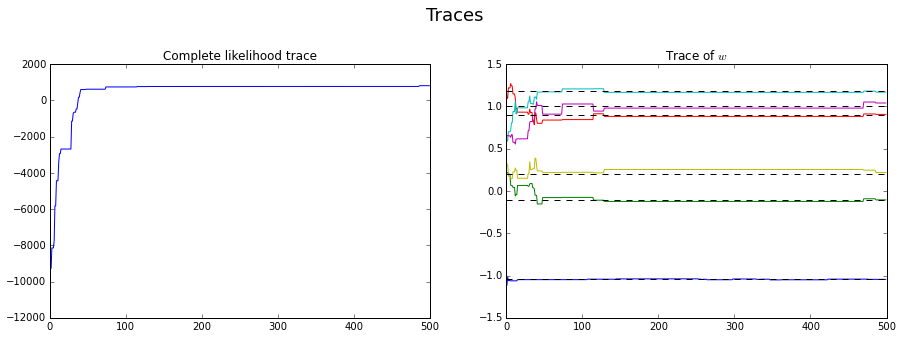

In [12]:
model.estimate(500)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model.logp_history)
plt.title("Complete likelihood trace")

plt.subplot(2, 2, 2)
plt.plot(model.samplers['b'].get_history())
plt.axhline(b_real, color='black', linestyle='--')
plt.plot(model.samplers['w'].get_history())
for wr in w_real:
    plt.axhline(wr, color='black', linestyle='--')
plt.title(r"Trace of $w$")

plt.suptitle(r"Traces", size=18)
plt.show()